<img src="./images/banner.png" width="800">

# Hyperparameter Tuning

Hyperparameter tuning is a crucial step in the machine learning pipeline that can significantly impact model performance. In this section, we'll explore what hyperparameters are, why they're important, and the general process of tuning them.


Hyperparameters are configuration settings for machine learning algorithms that are set before the learning process begins. Unlike model parameters, which are learned from the data during training, hyperparameters must be set manually or through automated tuning processes.


<img src="./images/hyperparameter.png" width="800">

Hyperparameters control the learning process and model structure, influencing how well a model learns from the data and generalizes to new, unseen data.


Examples of hyperparameters include:

- Learning rate in neural networks
- Number of trees in a random forest
- Regularization strength in regularized regression models
- Kernel type in Support Vector Machines (SVMs)


Hyperparameter tuning is essential for several reasons:

1. **Optimizing Model Performance:** Different hyperparameter values can lead to vastly different model performances. Tuning helps find the optimal configuration for your specific problem.

2. **Preventing Overfitting:** Proper tuning can help prevent overfitting by finding the right balance between model complexity and generalization.

3. **Adapting to Different Datasets:** The optimal hyperparameters for one dataset may not be ideal for another. Tuning allows models to adapt to specific data characteristics.


Without proper tuning, even the most sophisticated algorithms may underperform on your specific task. Effective tuning can be the difference between a mediocre model and a highly accurate one.


The general process of hyperparameter tuning involves the following steps:

1. **Define the Hyperparameter Search Space:** Determine which hyperparameters to tune and their possible values or ranges.

2. **Choose a Tuning Strategy:** Select a method for searching the hyperparameter space (e.g., grid search, random search).

3. **Set Up Cross-Validation:** Use cross-validation to assess model performance for each hyperparameter configuration.

4. **Evaluate and Compare:** Compare the performance of different hyperparameter configurations using appropriate metrics.

5. **Select the Best Configuration:** Choose the hyperparameter set that yields the best performance.

6. **Retrain and Validate:** Train the final model using the best hyperparameters and validate on a held-out test set.


While essential, hyperparameter tuning comes with its challenges:

- **Computational Expense:** Exhaustive search methods can be computationally intensive, especially for complex models or large datasets.
- **Risk of Overfitting:** Extensive tuning can lead to overfitting the validation set, necessitating careful use of holdout sets.
- **Interdependence:** Hyperparameters often interact with each other, making the tuning process more complex.


💡 **Pro Tip:** Start with a broad search of the hyperparameter space and gradually refine your search. This approach can help balance between exploration and computational efficiency.


In the following sections, we'll explore specific techniques for hyperparameter tuning, starting with the popular grid search and random search methods. We'll also discuss how to implement these techniques effectively using Scikit-learn.

**Table of contents**<a id='toc0_'></a>    
- [Grid Search](#toc1_)    
  - [Implementation with Scikit-learn](#toc1_1_)    
- [Random Search](#toc2_)    
  - [Implementation with Scikit-learn](#toc2_1_)    
  - [Comparing Random Search to Grid Search](#toc2_2_)    
- [Best Practices and Common Pitfalls](#toc3_)    
  - [Best Practices](#toc3_1_)    
  - [Common Pitfalls](#toc3_2_)    
- [Practical Implementation with Scikit-learn](#toc4_)    
  - [Setup and Data Preparation](#toc4_1_)    
  - [Creating a Pipeline](#toc4_2_)    
  - [Defining Parameter Grids](#toc4_3_)    
  - [Performing Hyperparameter Tuning](#toc4_4_)    
  - [Final Model Evaluation](#toc4_5_)    
  - [Interpreting the Results](#toc4_6_)    
  - [Final Thoughts](#toc4_7_)    
- [Summary](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Grid Search](#toc0_)

Grid search is one of the most straightforward and widely used methods for hyperparameter tuning. It involves defining a grid of hyperparameter values and evaluating the model's performance for each combination in the grid. Here's how it works:

1. **Define the Parameter Grid:** Specify a set of values for each hyperparameter you want to tune.
2. **Cartesian Product:** Create all possible combinations of these hyperparameter values.
3. **Train and Evaluate:** For each combination, train a model and evaluate its performance using cross-validation.
4. **Select the Best:** Choose the combination that yields the best performance metric.


<img src="./images/grid-vs-random.png" width="800">

Grid search performs an exhaustive search over the specified parameter values, ensuring that no combination is missed. Here are some of its advantages:
- Comprehensive: Evaluates all combinations in the defined grid.
- Deterministic: Always produces the same results for the same input.
- Easy to implement and parallelize.


However, it also has some disadvantages:
- Computationally expensive, especially for large parameter spaces.
- May waste time on unimportant parameters or suboptimal regions.
- Effectiveness depends on the granularity and choice of the grid.


### <a id='toc1_1_'></a>[Implementation with Scikit-learn](#toc0_)


Scikit-learn provides the `GridSearchCV` class for performing grid search with cross-validation. Here's a detailed example using the California Housing dataset for a regression task with regularization:


<img src="./images/cv.png" width="500">

In [41]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
# Load and split the data
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(random_state=42))
])

In [44]:
# Define the parameter grid
param_grid = {
    'elasticnet__alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [45]:
# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [46]:
# Perform grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elasticnet',
                                        ElasticNet(random_state=42))]),
             n_jobs=-1,
             param_grid={'elasticnet__alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
                         'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='neg_mean_squared_error')

In [47]:
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Note: GridSearchCV minimizes the score, so we negate it

print(f"Best parameters: {best_params}")
print(f"Best cross-validation MSE: {best_score:.4f}")

Best parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.1}
Best cross-validation MSE: 0.5799


In [48]:
# Evaluate on the test set
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test set MSE: {mse:.4f}")
print(f"Test set R-squared: {r2:.4f}")

Test set MSE: 0.5910
Test set R-squared: 0.5490


1. **Dataset:** We use the California Housing dataset, which is a regression problem predicting house prices based on various features.

2. **Pipeline:** We create a pipeline that first standardizes the features and then applies ElasticNet regression. This ensures that preprocessing steps are properly included in the cross-validation process.

3. **Parameter Grid:** We define a grid for two hyperparameters of ElasticNet:
   - `alpha`: The regularization strength (higher values increase regularization).
   - `l1_ratio`: The mix between L1 and L2 regularization (0 for pure L2, 1 for pure L1).

4. **GridSearchCV:** We use 5-fold cross-validation and negative mean squared error as the scoring metric. The `n_jobs=-1` parameter allows the search to use all available CPU cores.

5. **Evaluation:** After finding the best parameters, we evaluate the model on the held-out test set to get an unbiased estimate of its performance.


💡 **Pro Tip:** When using `GridSearchCV`, always check the `cv_results_` attribute for detailed information about each combination's performance. This can provide insights into parameter sensitivity and interactions.


❗️ **Important Note:** While grid search is thorough, it can be computationally expensive. For high-dimensional parameter spaces or when computational resources are limited, consider using random search or more advanced techniques.


🤔 **Why This Matters:** Proper hyperparameter tuning can significantly improve model performance. In this example, we're optimizing both the regularization strength and the type of regularization, which can help prevent overfitting and improve the model's generalization ability.


By using grid search, we systematically explore different combinations of hyperparameters to find the one that works best for our specific dataset and problem. This process helps us achieve better model performance and gain insights into how different hyperparameters affect our model's behavior.

## <a id='toc2_'></a>[Random Search](#toc0_)

Random search is an alternative to grid search that can be more efficient, especially when dealing with high-dimensional hyperparameter spaces. Instead of exhaustively trying every combination, random search samples random combinations from the parameter space. Here's how it works:

1. **Define Parameter Distributions:** Specify a distribution for each hyperparameter (e.g., uniform, log-uniform, discrete).
2. **Random Sampling:** Randomly sample hyperparameter values from these distributions.
3. **Train and Evaluate:** For each sampled combination, train a model and evaluate its performance using cross-validation.
4. **Select the Best:** Choose the combination that yields the best performance metric.


Random search can be more efficient than grid search, especially when not all hyperparameters are equally important. Here are some of its advantages:
- Often more efficient than grid search, especially in high-dimensional spaces.
- Can find good solutions with fewer iterations.
- Better at handling hyperparameters of different importance.


However, it also has some disadvantages:
- May miss optimal combinations due to its random nature.
- Results can vary between runs unless a fixed random seed is used.
- Harder to reproduce exact results compared to grid search.


### <a id='toc2_1_'></a>[Implementation with Scikit-learn](#toc0_)


Let's implement random search using Scikit-learn's `RandomizedSearchCV` on a Support Vector Regression (SVR) model with the California Housing dataset:


In [49]:
from scipy.stats import loguniform
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
# Load and split the data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression())
])


In [52]:
# Define the parameter distributions
param_distributions = {
    'logisticregression__C': loguniform(1e-1, 1e3),
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga'],
    'logisticregression__max_iter': [100, 200, 300]
}


In [53]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=100, cv=5,
    scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)


In [54]:
# Perform random search
random_search.fit(X_train, y_train)

/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17fddd9f0>,
                                        'logisticregression__max_iter': [100,
                                                                         200,
                                                                         300],
                                        'logisticregression__penalty': ['l1',
                                                                        'l2'],
                                        'logisticregression__solver': ['liblinear',
                                                                       'saga']},
                   random_state=42, scoring='neg_mean_squared_error')

In [55]:
# Get the best parameters and score
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Note: RandomizedSearchCV minimizes the score, so we negate it

print(f"Best parameters: {best_params}")
print(f"Best cross-validation MSE: {best_score:.4f}")


Best parameters: {'logisticregression__C': 131.45103232150103, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
Best cross-validation MSE: 0.0417


In [56]:
# Evaluate on the test set
y_pred = random_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [57]:
print(f"Test set MSE: {mse:.4f}")
print(f"Test set R-squared: {r2:.4f}")

Test set MSE: 0.0000
Test set R-squared: 1.0000


1. **Parameter Distributions:** We define distributions for each hyperparameter:
   - `C`: Regularization parameter (log-uniform distribution)
   - `epsilon`: Epsilon in the epsilon-SVR model (uniform distribution)
   - `gamma`: Kernel coefficient (log-uniform distribution)

2. **RandomizedSearchCV:** We set `n_iter=100`, meaning it will try 100 random combinations. This is typically much fewer than would be required for a comprehensive grid search.

3. **Evaluation:** Similar to grid search, we evaluate the best model on the held-out test set.

💡 **Pro Tip:** The parameter importance plot can help you understand which parameters have the most impact on model performance. This can guide future tuning efforts or feature engineering.


🤔 **Why This Matters:** Random search can often find good hyperparameter combinations more quickly than grid search, especially when the hyperparameter space is large or when some parameters are more important than others.


❗️ **Important Note:** While random search is generally more efficient, it's still important to set a reasonable number of iterations (`n_iter`) to ensure good coverage of the parameter space.


### <a id='toc2_2_'></a>[Comparing Random Search to Grid Search](#toc0_)


1. **Efficiency:** Random search can often find good solutions with fewer iterations, especially in high-dimensional spaces where grid search becomes impractical.

2. **Flexibility:** It's easier to add new parameters to random search without greatly increasing computational cost.

3. **Exploration:** Random search might stumble upon unexpected good combinations that a predefined grid might miss.

4. **Reproducibility:** While less deterministic, random search results can be reproduced by setting a fixed random seed.


By using random search, we can efficiently explore a large hyperparameter space and often find good solutions more quickly than with grid search. This approach is particularly valuable when dealing with computationally expensive models or when you have limited time or resources for hyperparameter tuning.

## <a id='toc3_'></a>[Best Practices and Common Pitfalls](#toc0_)

Hyperparameter tuning is a critical step in developing effective machine learning models. However, it's easy to fall into traps that can lead to suboptimal results or misleading conclusions. In this section, we'll explore best practices to follow and common pitfalls to avoid.


### <a id='toc3_1_'></a>[Best Practices](#toc0_)


**1. Start with a Wide Range, Then Refine**


Begin with a broad search of the hyperparameter space before narrowing down to more specific ranges.

- Initially use a wide range of values for each hyperparameter.
- After the initial search, zoom in on promising regions for more detailed exploration.


Example approach:
```python
# Initial broad search
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth': [3, 5, 7, 9]
}

# Refined search based on initial results
refined_param_grid = {
    'learning_rate': [0.005, 0.01, 0.02],
    'max_depth': [6, 7, 8]
}
```


**2. Use Appropriate Scales for Different Parameters**


Different hyperparameters may have different scales or behaviors. Use appropriate distributions or scales when defining search spaces.

- Use log scales for learning rates or regularization parameters.
- Use linear scales for integer parameters like tree depth or number of estimators.


```python
from scipy.stats import loguniform, randint

param_distributions = {
    'learning_rate': loguniform(1e-4, 1e-1),
    'max_depth': randint(3, 10)
}
```


**3. Leverage Domain Knowledge**

💡 **Pro Tip:** Incorporate your understanding of the problem and the algorithm to guide your hyperparameter search.

- Use sensible defaults as starting points.
- Narrow down ranges based on your experience with similar problems.


**4. Monitor Computational Resources**

Be mindful of the computational cost of your tuning process:

- Start with a smaller subset of your data for initial tuning.
- Use less expensive metrics for initial screening.
- Consider using early stopping criteria to terminate unpromising runs.


```python
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator, param_distributions, n_iter=100, cv=5,
    scoring='neg_mean_squared_error', n_jobs=-1,
    return_train_score=True,  # Useful for detecting overfitting
    error_score='raise'  # Raise errors for debugging
)
```


**5. Use Cross-Validation Consistently**


Ensure you're using consistent and appropriate cross-validation strategies:

- Use stratified k-fold for classification problems.
- Consider time-based splits for time series data.
- Maintain consistency in CV strategy across different tuning runs.


```python
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator, param_grid, cv=cv)
```


### <a id='toc3_2_'></a>[Common Pitfalls](#toc0_)


**1. Data Leakage**

❗️ **Important Note:** Ensure that your validation strategy doesn't introduce data leakage.

- Perform feature scaling and selection within cross-validation folds.
- Don't use test set information for tuning decisions.


Use pipelines to prevent leakage:


```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', YourModel())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
```


**2. Overfitting to the Validation Set**


Excessive tuning can lead to overfitting on the validation set:

- Use nested cross-validation for a more robust estimate of model performance.
- Reserve a final test set that is only used once you've completed all tuning.


**3. Ignoring Parameter Interactions**


Some parameters may have strong interactions with others:

- Pay attention to parameter combinations, not just individual parameters.
- Use visualization tools to understand parameter interactions.


```python
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results' is from GridSearchCV or RandomizedSearchCV
sns.heatmap(pd.pivot_table(
    pd.DataFrame(results),
    values='mean_test_score',
    index='param_max_depth',
    columns='param_learning_rate'
))
plt.title('Interaction between max_depth and learning_rate')
plt.show()
```


**4. Neglecting Model Stability**


Don't just focus on the best score; consider the stability of the model across different hyperparameters:

- Look at the distribution of scores, not just the best one.
- Consider ensemble methods to improve stability.


```python
plt.hist(results['mean_test_score'])
plt.title('Distribution of Model Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
```


**5. Overlooking Practical Considerations**

Remember that the "best" model in terms of performance might not always be the most practical:

- Consider trade-offs between performance and complexity/interpretability.
- Take into account model size, inference time, and other practical constraints.


🤔 **Why This Matters:** Following these best practices and avoiding common pitfalls will help you develop more robust, reliable, and practically useful models. It ensures that your hyperparameter tuning process leads to genuinely better models rather than overfitted or impractical solutions.


By being aware of these considerations, you can conduct more effective and meaningful hyperparameter tuning, leading to models that not only perform well in validation but also generalize better to real-world scenarios.

## <a id='toc4_'></a>[Practical Implementation with Scikit-learn](#toc0_)

In this section, we'll walk through a comprehensive example of hyperparameter tuning using Scikit-learn. We'll cover various aspects of the tuning process, from initial setup to final evaluation, using a real-world dataset and a practical machine learning task.


### <a id='toc4_1_'></a>[Setup and Data Preparation](#toc0_)


We'll use the Breast Cancer Wisconsin dataset for a binary classification task. This dataset is built into Scikit-learn, making it easy to access.


In [64]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (455, 30)
Test set shape: (114, 30)


### <a id='toc4_2_'></a>[Creating a Pipeline](#toc0_)


We'll create a pipeline that includes preprocessing and the model. This ensures that all preprocessing steps are properly included in the cross-validation process.


In [65]:
# Create pipelines for SVM and Random Forest
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

### <a id='toc4_3_'></a>[Defining Parameter Grids](#toc0_)


We'll define parameter grids for both SVM and Random Forest models. For SVM, we'll use random search, and for Random Forest, we'll use grid search.


In [66]:
# SVM parameter distribution for random search
svm_param_dist = {
    'svm__C': np.logspace(-3, 3, 7),
    'svm__kernel': ['rbf', 'sigmoid'],
    'svm__gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}

# Random Forest parameter grid for grid search
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

### <a id='toc4_4_'></a>[Performing Hyperparameter Tuning](#toc0_)


Now, let's perform the actual tuning using `RandomizedSearchCV` for SVM and `GridSearchCV` for Random Forest.


In [67]:
# Random search for SVM
svm_random_search = RandomizedSearchCV(
    svm_pipeline, svm_param_dist, n_iter=100, cv=5, 
    scoring='accuracy', n_jobs=-1, random_state=42, verbose=1
)

# Grid search for Random Forest
rf_grid_search = GridSearchCV(
    rf_pipeline, rf_param_grid, cv=5, 
    scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the searches
print("Performing SVM Random Search...")
svm_random_search.fit(X_train, y_train)

print("\nPerforming Random Forest Grid Search...")
rf_grid_search.fit(X_train, y_train)

Performing SVM Random Search...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Performing Random Forest Grid Search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

### <a id='toc4_5_'></a>[Final Model Evaluation](#toc0_)


Finally, we'll evaluate the best models on the test set to get an unbiased estimate of their performance.


In [74]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"\nTest Set Evaluation for {model_name}:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Test Set Evaluation for SVM:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



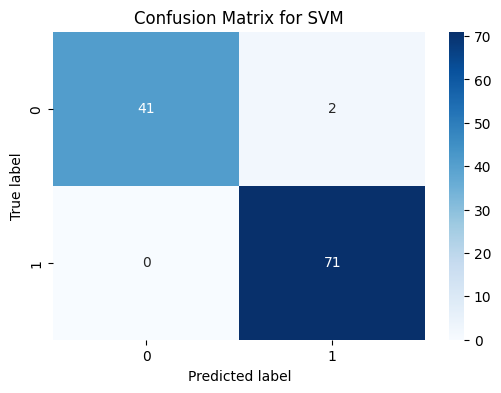

In [75]:
evaluate_model(svm_random_search.best_estimator_, X_test, y_test, "SVM")


Test Set Evaluation for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



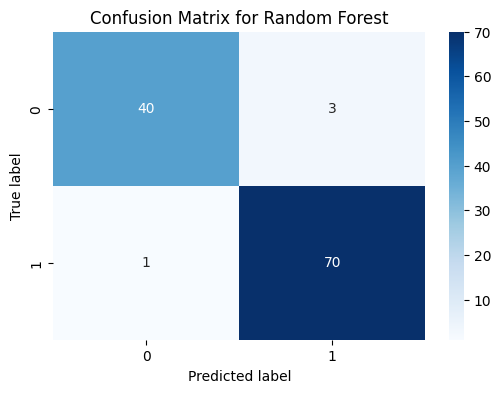

In [76]:
evaluate_model(rf_grid_search.best_estimator_, X_test, y_test, "Random Forest")

### <a id='toc4_6_'></a>[Interpreting the Results](#toc0_)


🔑 **Key Concept:** Always interpret your results in the context of your problem and dataset.


- Compare the performance of different models (SVM vs Random Forest in this case).
- Look at the best hyperparameters for each model and try to understand why they might work well.
- Consider the trade-offs between model complexity and performance.


💡 **Pro Tip:** Don't just focus on accuracy. Look at precision, recall, and F1-score, especially if your classes are imbalanced.


### <a id='toc4_7_'></a>[Final Thoughts](#toc0_)


🤔 **Why This Matters:** This practical implementation demonstrates a complete hyperparameter tuning workflow. By following this process, you can:

1. Systematically explore different hyperparameter combinations.
2. Understand which parameters are most important for your specific problem.
3. Compare different models on equal footing.
4. Make informed decisions about model selection and configuration.


❗️ **Important Note:** While this example uses accuracy as the scoring metric, always choose a metric that aligns with your problem's goals. For imbalanced datasets, consider metrics like F1-score, ROC AUC, or precision-recall AUC.


By applying these techniques to your own projects, you can develop more robust and effective machine learning models, tailored to your specific needs and data characteristics.

## <a id='toc5_'></a>[Summary](#toc0_)

Hyperparameter tuning is a crucial step in the machine learning pipeline that can significantly enhance model performance and generalization. Let's recap the key points we've covered in this lecture:

1. **Importance of Hyperparameter Tuning**
   - Hyperparameters control the learning process and model structure.
   - Proper tuning can lead to substantial improvements in model performance.

2. **Tuning Techniques**
   - **Grid Search**: Exhaustive search over specified parameter values.
   - **Random Search**: Random sampling from parameter distributions, often more efficient than grid search.
   - Advanced techniques like Bayesian Optimization exist for more sophisticated tuning.

3. **Best Practices**
   - Start with a wide range of values and then refine.
   - Use appropriate scales for different parameters (e.g., log scale for learning rates).
   - Leverage domain knowledge to guide your search.
   - Monitor computational resources and use them efficiently.
   - Employ consistent cross-validation strategies.

4. **Common Pitfalls to Avoid**
   - Data leakage during preprocessing or feature selection.
   - Overfitting to the validation set.
   - Ignoring parameter interactions.
   - Neglecting model stability across different hyperparameters.
   - Overlooking practical considerations like model complexity and inference time.

5. **Practical Implementation**
   - Scikit-learn provides powerful tools like `GridSearchCV` and `RandomizedSearchCV`.
   - Use pipelines to ensure proper inclusion of preprocessing steps in cross-validation.
   - Analyze results thoroughly, including parameter importance and score distributions.


Hyperparameter tuning is both an art and a science. While systematic approaches are crucial, intuition and domain knowledge play significant roles.


Always consider the trade-off between tuning effort and potential gains. Sometimes, a simple model with decent hyperparameters can outperform a complex model with extensively tuned parameters.


Effective hyperparameter tuning can be the difference between a mediocre model and a highly performant one. It allows you to extract the maximum potential from your chosen algorithm and dataset.


❗️ **Important Note:** Remember that the ultimate goal is not just to achieve high performance on your validation set, but to create a model that generalizes well to unseen data and solves your real-world problem effectively.


By mastering the art of hyperparameter tuning, you'll be better equipped to develop robust, high-performing machine learning models across a wide range of applications and domains. As you gain experience, you'll develop intuition about which hyperparameters are likely to be most impactful for different types of problems, allowing you to tune your models more efficiently and effectively.